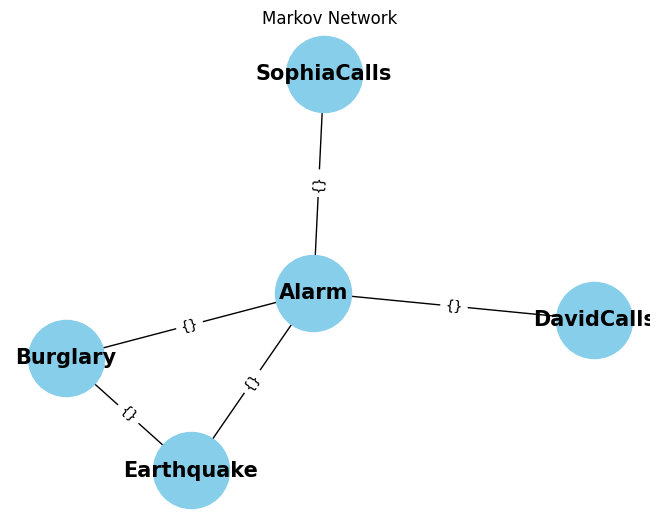

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the Markov Network
G = nx.Graph()
G.add_edges_from([
    ('Burglary', 'Earthquake'),
    ('Burglary', 'Alarm'),
    ('Earthquake', 'Alarm'),
    ('Alarm', 'DavidCalls'),
    ('Alarm', 'SophiaCalls')
])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos)
plt.title("Markov Network")
plt.show()


# code -2

### Bayesian Network


Bayesian Network structure:
('Burglary', 'Alarm')
('Alarm', 'DavidCalls')
('Alarm', 'SophiaCalls')
('Earthquake', 'Alarm')

CPDs:
+-------------+------+
| Burglary(0) | 0.99 |
+-------------+------+
| Burglary(1) | 0.01 |
+-------------+------+
+---------------+------+
| Earthquake(0) | 0.98 |
+---------------+------+
| Earthquake(1) | 0.02 |
+---------------+------+
+------------+---------------+---------------+---------------+---------------+
| Burglary   | Burglary(0)   | Burglary(0)   | Burglary(1)   | Burglary(1)   |
+------------+---------------+---------------+---------------+---------------+
| Earthquake | Earthquake(0) | Earthquake(1) | Earthquake(0) | Earthquake(1) |
+------------+---------------+---------------+---------------+---------------+
| Alarm(0)   | 0.999         | 0.71          | 0.06          | 0.05          |
+------------+---------------+---------------+---------------+---------------+
| Alarm(1)   | 0.001         | 0.29          | 0.94          | 0.95          

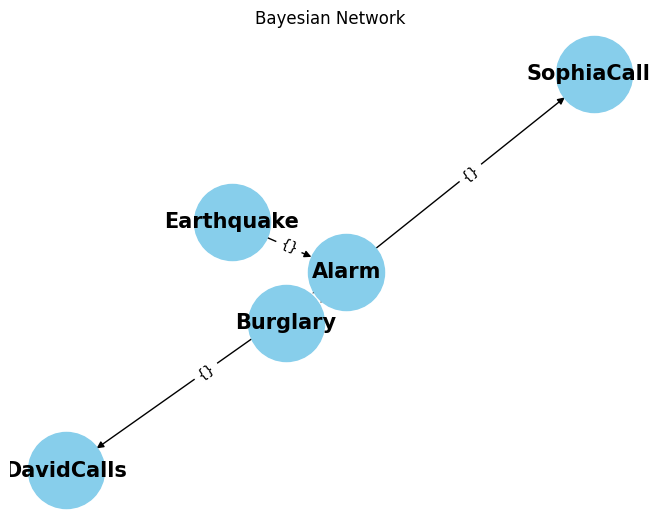

In [3]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt

# Define the Bayesian Network structure
model = BayesianNetwork([('Burglary', 'Alarm'),
                         ('Earthquake', 'Alarm'),
                         ('Alarm', 'DavidCalls'),
                         ('Alarm', 'SophiaCalls')])

# Define the CPDs
cpd_burglary = TabularCPD(variable='Burglary', variable_card=2, values=[[0.99], [0.01]])
cpd_earthquake = TabularCPD(variable='Earthquake', variable_card=2, values=[[0.98], [0.02]])

cpd_alarm = TabularCPD(variable='Alarm', variable_card=2,
                       values=[[0.999, 0.71, 0.06, 0.05],
                               [0.001, 0.29, 0.94, 0.95]],
                       evidence=['Burglary', 'Earthquake'],
                       evidence_card=[2, 2])

cpd_david_calls = TabularCPD(variable='DavidCalls', variable_card=2,
                             values=[[0.95, 0.1],
                                     [0.05, 0.9]],
                             evidence=['Alarm'],
                             evidence_card=[2])

cpd_sophia_calls = TabularCPD(variable='SophiaCalls', variable_card=2,
                              values=[[0.99, 0.3],
                                      [0.01, 0.7]],
                              evidence=['Alarm'],
                              evidence_card=[2])

# Add CPDs to the model
model.add_cpds(cpd_burglary, cpd_earthquake, cpd_alarm, cpd_david_calls, cpd_sophia_calls)

# Check model validity
assert model.check_model()

# Print the model structure and CPDs
print("Bayesian Network structure:")
for edge in model.edges():
    print(edge)

print("\nCPDs:")
for cpd in model.get_cpds():
    print(cpd)

# Visualize the Bayesian Network
def plot_bayesian_network(model):
    G = nx.DiGraph()

    # Add nodes and edges to the graph
    for node in model.nodes():
        G.add_node(node)
    for edge in model.edges():
        G.add_edge(*edge)

    # Draw the graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos)
    plt.title("Bayesian Network")
    plt.show()

# Plot the Bayesian Network
plot_bayesian_network(model)


### Converting bayesian to Markov network

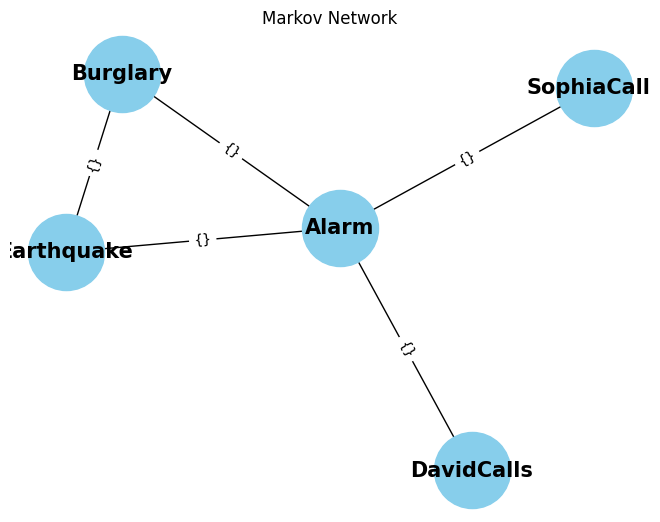

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the Markov Network
G = nx.Graph()
G.add_edges_from([
    ('Burglary', 'Earthquake'),
    ('Burglary', 'Alarm'),
    ('Earthquake', 'Alarm'),
    ('Alarm', 'DavidCalls'),
    ('Alarm', 'SophiaCalls')
])

# Draw the Markov Network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos)
plt.title("Markov Network")
plt.show()
